## Import

In [45]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# API credentials for Kaggle
with open('kaggle.json') as f:
   data = json.load(f)

os.environ['KAGGLE_USERNAME'] = data['username']
os.environ['KAGGLE_KEY'] = data['key']

from kaggle.api.kaggle_api_extended import KaggleApi

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())


/Users/mauriceruegg/Documents/ZHAW_lokal/4_Semester/Scientific_Prototyping/scientific_programming/testproject


## Use the kaggle Web to download the fruit consumption table

In [38]:
# Initialize API
api = KaggleApi()
api.authenticate()

# Download file
api.dataset_download_file('zain280/fruit-consumption-habits','Fruits_Consumptions_Habits.csv')

# Read data to pandas data frame
df = pd.read_csv('Fruits_Consumptions_Habits.csv', sep=',')
df

,ID,Age,Gender,Country,Favorite Fruit,Frequency of Consumption,Preferred Form of Fruit
0,1,32,Male,USA,Apple,Daily,Fresh
1,2,45,Female,Canada,Banana,2-3 times a week,Smoothie
2,3,28,Male,UK,Orange,Once a week,Juice
3,4,50,Female,Australia,Mango,Daily,Fresh
4,5,19,Female,Germany,Strawberry,4-5 times a week,Salad
...,...,...,...,...,...,...,...
1433,1434,40,Female,France,Strawberry,Daily,Smoothie
1434,1435,53,Male,USA,Apple,Once a week,Fresh
1435,1436,27,Female,Canada,Banana,Once a week,Smoothie
1436,1437,36,Male,UK,Orange,4-5 times a week,Juice


## (2) Data preparation (e.g. strings to numerical using regular expressions):

You've already used pandas DataFrame extensively in your code. Let's demonstrate the use of a Python list to store unique countries from the dataset.

In [47]:
# Define a function to convert frequency strings to numerical values
def convert_frequency_to_numeric(freq_string):
    if freq_string == 'Daily':
        return 7
    elif freq_string == '2-3 times a week':
        return 2.5
    elif freq_string == 'Once a week':
        return 1
    else:
        return 0  # For other cases or missing values

# Apply the function to the 'Frequency of Consumption' column
df['Frequency_Numeric'] = df['Frequency of Consumption'].apply(convert_frequency_to_numeric)



## (3) Use of Python built-in data structures (lists, dictionaries, sets, tuples) and pandas data frames:
You've already used pandas DataFrame extensively in your code. Let's demonstrate the use of a Python list to store unique countries from the dataset.

In [40]:
# Create a list of unique countries
unique_countries = df['Country'].unique()
print(unique_countries)

['USA' 'Canada' 'UK' 'Australia' 'Germany' 'France']


## (4) Use of conditional statements, loop control statements, and loops:
Let's use a loop to print out the frequency of consumption for each fruit, but only for males.

In [48]:
# Loop through each row in the DataFrame
for index, row in df.iterrows():
    if row['Gender'] == 'Male':
        print(f"ID: {row['ID']}, Fruit: {row['Favorite Fruit']}, Frequency: {row['Frequency of Consumption']}")


ID: 1, Fruit: Apple, Frequency: Daily
ID: 3, Fruit: Orange, Frequency: Once a week
ID: 6, Fruit: Apple, Frequency: 2-3 times a week
ID: 9, Fruit: Mango, Frequency: Daily
ID: 11, Fruit: Apple, Frequency: Daily
ID: 13, Fruit: Orange, Frequency: Once a week
ID: 15, Fruit: Strawberry, Frequency: 4-5 times a week
ID: 17, Fruit: Banana, Frequency: Once a week
ID: 19, Fruit: Mango, Frequency: Daily
ID: 21, Fruit: Apple, Frequency: Once a week
ID: 23, Fruit: Orange, Frequency: Daily
ID: 25, Fruit: Strawberry, Frequency: Daily
ID: 27, Fruit: Banana, Frequency: Once a week
ID: 29, Fruit: Mango, Frequency: Daily
ID: 31, Fruit: Apple, Frequency: 4-5 times a week
ID: 33, Fruit: Orange, Frequency: 2-3 times a week
ID: 35, Fruit: Strawberry, Frequency: Daily
ID: 37, Fruit: Banana, Frequency: 3-4 times a week
ID: 39, Fruit: Mango, Frequency: Daily
ID: 41, Fruit: Apple, Frequency: Once a week
ID: 43, Fruit: Orange, Frequency: 2-3 times a week
ID: 45, Fruit: Strawberry, Frequency: Daily
ID: 47, Fruit: B

## (5) Use of procedural programming or object-oriented programming (one of these or both):

You've already used procedural programming in your code. Let's demonstrate a simple object-oriented approach to calculate the average age of males and females separately.

In [49]:
class AgeCalculator:
    def __init__(self, df):
        self.df = df

    def average_age_by_gender(self, gender):
        filtered_df = self.df[self.df['Gender'] == gender]
        avg_age = filtered_df['Age'].mean()
        return avg_age

# Create an instance of AgeCalculator
calculator = AgeCalculator(df)
# Calculate average age for males and females
avg_age_male = calculator.average_age_by_gender('Male')
avg_age_female = calculator.average_age_by_gender('Female')
print("Average age of males:", avg_age_male)
print("Average age of females:", avg_age_female)


Average age of males: 37.21587743732591
Average age of females: 36.68194444444445


## (6) Use of tables, visualizations/graphics for data exploration:
Let's create a bar plot to visualize the distribution of favorite fruits.

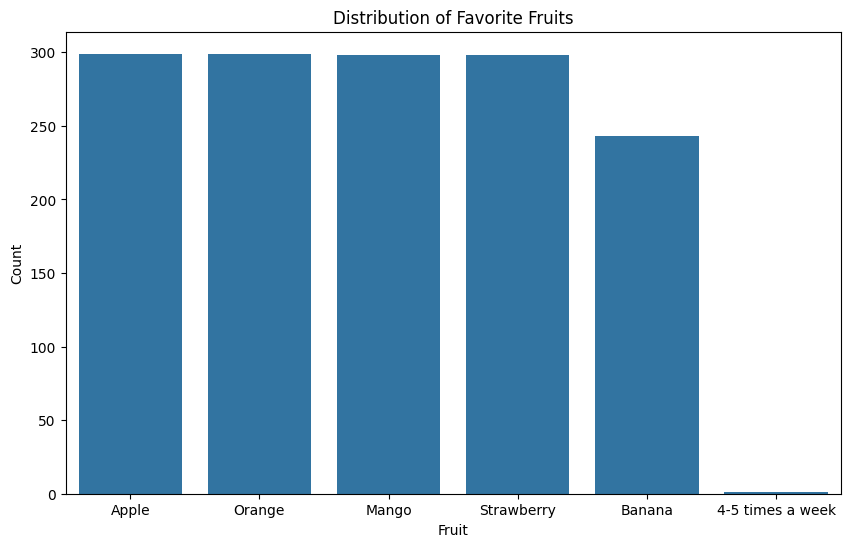

In [52]:
# Count the occurrences of each fruit
fruit_counts = df['Favorite Fruit'].value_counts()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=fruit_counts.index, y=fruit_counts.values)
plt.title('Distribution of Favorite Fruits')
plt.xlabel('Fruit')
plt.ylabel('Count')
plt.show()


## (7) Integration of statistical analyses (e.g. correlation analysis, statistical test); must contain a p-value:
Let's conduct a correlation analysis between age and frequency of consumption, and test if the correlation is significant.

In [53]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df['Age'], df['Frequency_Numeric'])
print("Pearson correlation coefficient:", correlation_coefficient)
print("p-value:", p_value)


Pearson correlation coefficient: 0.09022176648245572
p-value: 0.0006140999915504136
